# Mind the Gap, Difference between male and female developers.

## Project Overview

Every Year Stack Overflow Publishes its developer survey.  In this project.  I used  2019 to analyze and find the difference between female and male developers. 

The questions I was interested to answer: 
- What proportion of participants is a woman group?
- What is the most popular Programming language among female and male developers?
- What type of developer they are? Do they code foe living or for fun?
- What is the age proportion between male and female groups?
- What are the top 10 countries the participants live in?
- What type of employment the respondents have?
- And, most importantly, what is the difference in their pay?


The project consists of three parts:

- Assessing and Cleaning Data
- Exploratory Data Analysis
- Conclusion

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

<a id=’Assessing_and_Cleaning_Data’></a>

## Assessing and Cleaning Data

Data is available to download from [Stack Overflow](https://insights.stackoverflow.com/survey/2019)

In [2]:
import zipfile
with zipfile.ZipFile("developer_survey_2019.zip","r") as zip_ref:
    zip_ref.extractall("data")

In [3]:
# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 200)# set jupyter's max column width to 50
pd.set_option('display.max_colwidth', 200)

In [28]:
df = pd.read_csv("data/survey_results_public.csv")
schema = pd.read_csv("data/survey_results_schema.csv")

In [29]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

In [30]:
df.tail()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
88878,88377,NaN,Yes,Less than once a month but more than once per year,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;JavaScript;Other(s):,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):,Firebase;SQLite,Firebase;MySQL;SQLite,Linux,Google Cloud Platform;Linux,jQuery,jQuery;Vue.js,Node.js,React Native;Unity 3D;Unreal Engine,Atom;Visual Studio;Visual Studio Code,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,What?,YouTube,NaN,Username,I don't remember,A few times per week,Find answers to specific questions;Learn how to do things I didn’t necessarily look for;Pass the time / relax,3-5 times per week,Stack Overflow was slightly faster,11-30 minutes,Yes,I have never participated in Q&A on Stack Overflow,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, I've heard of them, but I am not part of a private Q&A instance","No, not at all",NaN,Tech articles written by other developers;Tech meetups or events in your area;Courses on technologies you're interested in,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software is about the same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than proprietary / closed source software","Independent contractor, freelancer, or self-employed",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88882,88863,NaN,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than proprietary / closed source software","Not employed, and not looking for work",Spain,"Yes, full-time","Professional degree (JD, MD, etc.)","Computer science, computer engineering, or software engin

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [32]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [33]:
df.shape

(88883, 85)

In [34]:
schema.shape

(85, 2)

#### Columns 

In [35]:
schema.sort_values('Column')

,Column,QuestionText
77,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
14,Age1stCode,"At what age did you write your first line of code or program? (E.g., webpage, Hello World, Scratch project)"
58,BetterLife,Do you think people born today will have a better life than their parents?
57,BlockchainIs,Blockchain / cryptocurrency technology is primarily:
56,BlockchainOrg,How is your organization thinking about or implementing blockchain technology?
16,CareerSat,"Overall, how satisfied are you with your career thus far?"
38,CodeRev,Do you review code as part of your work?
39,CodeRevHrs,"On average, how many hours per week do you spend on code review?"
30,CompFreq,"Is that compensation weekly, monthly, or yearly?"
29,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If yo..."


Checking the descriptions in the schema data set, I chose the columns I need for my data analysis.

In [36]:
#created new data frame
df_new = df[['Respondent', 'Age','Gender','Country','Employment', \
     'ConvertedComp','MainBranch','LanguageWorkedWith']]

# shape of new data set
df_new.shape

(88883, 8)

In [37]:
#columns I will work with
columns = list(df_new.columns)
columns 

['Respondent',
 'Age',
 'Gender',
 'Country',
 'Employment',
 'ConvertedComp',
 'MainBranch',
 'LanguageWorkedWith']

In [38]:
#rename columns
df_new = df_new.rename(columns={ 'ConvertedComp':"Salary",'MainBranch':"Professional",\
                                'LanguageWorkedWith': "Program_Language"})

#### Gender
Preprocessing steps:

- changed values into three categories:
     -  Man
     - Women
     - NoGender

In [39]:
df_new.Gender.value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [40]:
#change gender column to 3 groups: Female, Male, NoGender
df_new.Gender=df_new.Gender.apply(lambda x: x if x in ('Man', 'Woman') else "NoGender")

In [41]:
#check for null values
df_new.isnull().sum().sort_values(ascending=False)

Salary              33060
Age                  9673
Employment           1702
Program_Language     1314
Professional          552
Country               132
Gender                  0
Respondent              0
dtype: int64

In [42]:
# check if there are any columns with missing values more than 30%
b = []
for i in df_new.columns[df_new.isna().sum() >df_new.shape[0]/100*30]:
    b.append(i)
b

['Salary']

#### Salary

Preprocessing steps:
- Replaced missing values wiith zero
    


The only salary is missing more than 30%., it could be for lots of reason: the respondent might not have a job, ore work as a volunteer
I can print statistics to investigate more and to check with "Employment" column.

In [43]:
df_new[(df_new['Employment'].isnull())].Salary.min()

0.0

In [44]:
df_new.groupby("Employment").Salary.min()

Employment
Employed full-time                                      0.0
Employed part-time                                      0.0
Independent contractor, freelancer, or self-employed    0.0
Not employed, and not looking for work                  NaN
Not employed, but looking for work                      NaN
Retired                                                 NaN
Name: Salary, dtype: float64

Based on this information, we can see that the data makes sense. The Nan values present in observation where if a participant has no job. I can replace Nun values with zero. 

In [45]:
df_new.Salary.fillna(0, inplace=True)

#### Employment
Preprocessing steps:

- removed some rows with missing data

In [46]:
df_new[(df_new['Employment'].isnull())].tail(10)

,Respondent,Age,Gender,Country,Employment,Salary,Professional,Program_Language
88827,80100,NaN,NoGender,Other Country (Not Listed Above),NaN,0.0,NaN,NaN
88838,82007,40.0,Woman,Canada,NaN,0.0,NaN,Assembly;Java;JavaScript;Objective-C;Python
88839,82134,NaN,Man,China,NaN,0.0,NaN,PHP;SQL
88841,82789,17.0,Man,United Kingdom,NaN,0.0,NaN,Bash/Shell/PowerShell;C++;C#;HTML/CSS;Python;Ruby
88847,83648,NaN,NoGender,NaN,NaN,0.0,NaN,NaN
88855,85182,NaN,Woman,Canada,NaN,0.0,NaN,Dart
88861,85744,NaN,NoGender,NaN,NaN,0.0,NaN,NaN
88863,85961,45.0,Man,United Kingdom,NaN,0.0,NaN,C;C++;Other(s):
88873,88062,NaN,NoGender,NaN,NaN,0.0,NaN,NaN
88879,88601,NaN,NoGender,NaN,NaN,0.0,NaN,NaN


I have checked the rows with missing values for employment and noticed that some of them have most of the information Nun, I decided to check them against other missing feature and drop these row.

In [47]:
#check for null values
df_new.isnull().sum().sort_values(ascending=False)

Age                 9673
Employment          1702
Program_Language    1314
Professional         552
Country              132
Salary                 0
Gender                 0
Respondent             0
dtype: int64

In [48]:
#filter rows with missing Age and Employment
col_to_del = list(df_new[(df_new['Employment'].isnull())&(df_new['Age'].isnull())].Respondent)

In [49]:
# delete these rows
df_new = df_new[~df_new.Respondent.isin(col_to_del)]

#### Age

Preprocessing steps:
- replaced age missing values I replaced with median value.
- added an additional column with age bins. 

In [50]:
# replace NaN values in age column with median income
df_new.Age.fillna(df_new.Age.median(),inplace = True)

In [51]:

def age(age_years):
    '''
    INPUT
        age in years - an integer of one of the values from the Age column
    
    OUTPUT
        string representing an age group of respondent     
    '''
    if age_years < 18:
        age_years = 'Under 18 years old'
    elif age_years  <25:
        age_years = '18 - 24 years old'
    elif age_years <35:
        age_years = '25 - 34 years old'
    elif age_years  <45:
        age_years = '35 - 44 years old'
    elif age_years  <55:
        age_years = '45 - 54 years old'
    elif age_years  <65:
        age_years = '55 - 64 years old'
    else :
        age_years = '65 years or older'
    return age_years
        
            
     

df_new["Age_Cat"]=df_new["Age"].apply(age)

#### Proffesional



Preprocessing steps:
- I replaced long values wiht a shorter version.

In [52]:
# unique values in professional column
df_new.Professional.unique()

array(['I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am', nan],
      dtype=object)

In [53]:
# create a dictionary with long versiono as a key and shorter version as a value
prof_dic = {'I am a student who is learning to code':'Student', 
           'I am a student who is learning to code':'Semi-Developer',
           'I am a developer by profession':"Developer", 
           'I used to be a developer by profession, but no longer am':'Ex-Developer'}

In [54]:
# replace long vallues with shorter
df_new.Professional = df_new.Professional.map(prof_dic)

<b>Missing Categorical Values</b>

Preprocessing steps:
- I replaced Nan categorical values with "Other"

In [597]:
df_new.fillna("Other",inplace = True)

In [598]:
#check again for null values
df_new.isnull().sum().sum()

0

## Exploratory Data Analysis

### Proportion

What is the gender distribution of this survey?

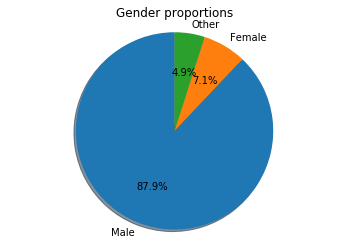

In [55]:
# Gender pie chart
labels = 'Male', 'Female', 'Other'
sizes = df_new.Gender.value_counts()
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender proportions');
plt.show()

In [56]:
#Keep the only rows associated with Male and Female participants
df_new = df_new.loc[df_new.Gender.isin(['Man', 'Woman'])]

In [57]:
# split data into female and male data sets
df_f = df_new[df_new.Gender=='Woman']
df_m = df_new[df_new.Gender == 'Man']

Only 7.1 per cent of all respondents are women and 87.9 by men.

### Popular Programming Languages

What is the most popular programming language among men and women?

In [65]:
# create a list of all programming languages, participants mentioned in the survey
langs = ['C','R','C#', 'C++', 'Java', 'Python','HTML/CSS', 'JavaScript', 'SQL', 'PHP', \
       'Bash/Shell/PowerShell']


In [69]:
from collections import defaultdict
# helper function to create a df from a column, containing value_counts 
# credits to Udacity Data Science ND programme
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('Count', ascending=False, inplace=True)
    return new_df.iloc[:10, :]

In [70]:
# helper function to create a df from column and plot bar chart
# credits to Udacity Data Science ND programme
def clean_and_plot(df, col1, title='10 Most Popular Programming Languages.', plot=True):
    '''
    INPUT 
        df - a dataframe holding the  column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a bar chart
    '''
    study = df[col1].value_counts().reset_index()
    study.rename(columns={'index': col1, col1: 'Count'}, inplace=True)
    study_df = total_count(study, col1, 'Count', possible_vals)

    study_df.set_index(col1, inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    


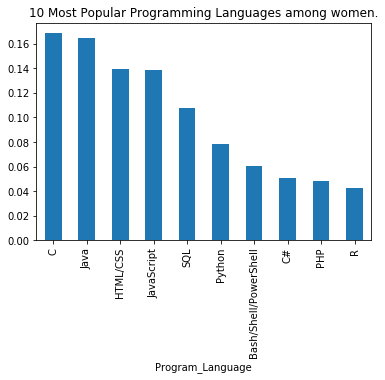

In [71]:
# display the most popular languages bar chart (female)
possible_vals = langs
lang_f = clean_and_plot(df_f,"Program_Language",  "10 Most Popular Programming Languages among women.")

In [73]:
clean_and_plot(df_f,"Program_Language",  "10 Most Popular Programming Languages among women.", False)

,Count
Program_Language,
C,0.168831
Java,0.165184
HTML/CSS,0.139897
JavaScript,0.138636
SQL,0.107555
Python,0.078213
Bash/Shell/PowerShell,0.060628
C#,0.050676
PHP,0.048086


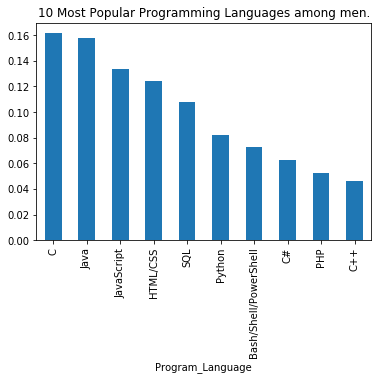

In [74]:
# display the most popular languages bar chart (male)
lang_m = clean_and_plot(df_m, "Program_Language",  "10 Most Popular Programming Languages among men.")

In [75]:
clean_and_plot(df_m, "Program_Language",  "10 Most Popular Programming Languages among men.", False)

,Count
Program_Language,
C,0.161689
Java,0.157695
JavaScript,0.133449
HTML/CSS,0.124083
SQL,0.107628
Python,0.082073
Bash/Shell/PowerShell,0.072952
C#,0.062201
PHP,0.052055


The 10 top popular languages are the same among female and male developers, the difference is only in final position. Women rank 10ht popular language as R, while men think it is C++.

### Type of Developer

What type of developer respondents are? Do they code foe living or for fun?

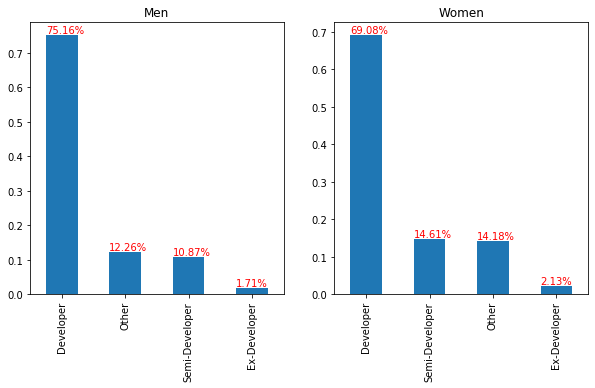

In [736]:
status_vals_f =df_f.Professional.value_counts()/df_f.shape[0]
status_vals_m =df_m.Professional.value_counts()/df_m.shape[0]
fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
status_vals_m.plot(kind="bar");
for i, v in enumerate(status_vals_m):
    plt.text(i-.25, 
              v+0.005, '{:.2f}%'.format(100*v), color ="red")
plt.title("Men");
plt.subplot(1, 2, 2)
status_vals_f.plot(kind="bar");
for i, v in enumerate(status_vals_f):
    plt.text(i-.25, 
              v+0.005, '{:.2f}%'.format(100*v), color ="red")
plt.title("Women");

75 per cent of male respondents work as professional developers compare to 69 per cent of women. On the contrary, 14.61% of ladies perform some sort of codding at work compare to 10.87 per cent of the male respondents.

## Age and gender

What is the Age proportion between male and female groups?

C:\Users\porub\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


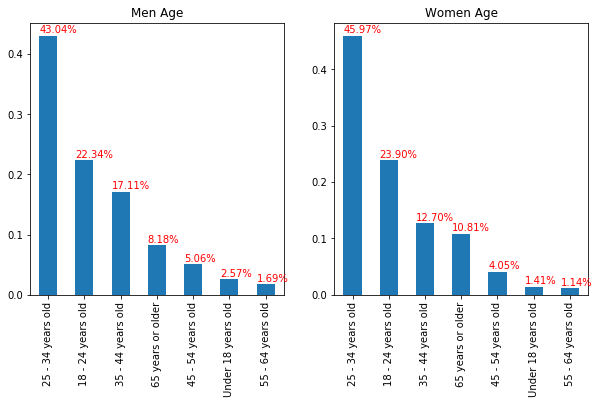

In [733]:
m_age = (df_new[df_new.Gender=="Man"]["Age_Cat"].value_counts()/df_m.shape[0])
f_age = (df_new[df_new.Gender=="Woman"]["Age_Cat"].value_counts()/df_f.shape[0])
fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
m_dev.plot(kind="bar");
plt.title("Men Age");
for i, v in enumerate(m_age):
    plt.text(i-.25, 
              v+0.005, '{:.2f}%'.format(100*v), color ="red")
plt.subplot(1, 2, 2)
f_dev.plot(kind="bar");
for i, v in enumerate(f_age):
    plt.text(i-.25, 
              v+0.005, '{:.2f}%'.format(100*v), color ="red")
plt.subplot(1, 2, 2)
plt.title("Women Age");


In [625]:
possible_vals= list(df_new.Age_Cat.unique())

In [627]:
#https://pandas.pydata.org/pandas-docs/stable/style.html

woman_perc = clean_and_plot(df_f, "Age_Cat",'', plot=False)
man_perc = clean_and_plot(df_m, "Age_Cat",'', plot=False)
woman_perc
comp_df = pd.merge(woman_perc, man_perc, left_index=True, right_index=True)
comp_df
comp_df.columns = ['woman_perc', 'man_perc']
comp_df['Diff_w_m'] = comp_df['woman_perc'] - comp_df['man_perc']
comp_df.style.bar(subset=['Diff_w_m'], align='mid', color=['#d65f5f', '#5fba7d'])

,woman_perc,man_perc,Diff_w_m
Age_Cat,,,
25 - 34 years old,0.459743,0.430429,0.0293136
18 - 24 years old,0.239003,0.223418,0.0155847
35 - 44 years old,0.127045,0.171079,-0.0440341
65 years or older,0.108147,0.0817889,0.0263578
45 - 54 years old,0.0404955,0.0506251,-0.0101296
Under 18 years old,0.0141337,0.0257121,-0.0115784
55 - 64 years old,0.011434,0.0169481,-0.00551404


The difference in age groups is minimal. The biggest discrepancy of nearly 4.5 per cent is in the 35-44 age group.

## How Woman is represented in top countries

What are the top 10 countries the participants live in?

In [628]:
top_countries = df_new.groupby('Country')['Country'].count().sort_values(ascending=False).head(10)
top_countries


Country
United States     19725
India              8317
Germany            5562
United Kingdom     5470
Canada             3215
France             2286
Brazil             1904
Poland             1860
Australia          1782
Netherlands        1782
Name: Country, dtype: int64

In [639]:
possible_vals = df_f.Country.unique()
woman_perc = clean_and_plot(df_f, "Country",'Higher Formal Education',plot=False)
man_perc = clean_and_plot(df_m, "Country",'Max of Bachelors Higher Ed',plot=False)
woman_perc
comp_df = pd.merge(woman_perc, man_perc, left_index=True, right_index=True)
comp_df
comp_df.columns = ['woman_perc', 'man_perc']
comp_df['Diff_w_m'] = comp_df['woman_perc'] - comp_df['man_perc']
comp_df.style.bar(subset=['Diff_w_m'], align='left', color=['#d65f5f', '#5fba7d'])

,woman_perc,man_perc,Diff_w_m
Country,,,
United States,0.495256,0.369834,0.125422
India,0.13425,0.162532,-0.0282818
United Kingdom,0.100806,0.10579,-0.00498314
Canada,0.0735294,0.0609155,0.0126139
Germany,0.0702087,0.110424,-0.0402151
France,0.0265655,0.045587,-0.0190216
Australia,0.0260911,0.0350605,-0.00896941
Poland,0.0256167,0.036738,-0.0111213
Netherlands,0.0253795,0.0351234,-0.0097439


The top 3 counties of respondents residence are US, India and UK. The proportion of female developers recited in the US outnumbered male developers by 12.5%. This may change if the perception of a woman as a developer. 

## Employment

What type of employment the respondents have?

In [640]:
employment = df_new.groupby('Employment')['Employment'].count().sort_values(ascending=False).head(10)
employment

Employment
Employed full-time                                      61518
Independent contractor, freelancer, or self-employed     8075
Not employed, but looking for work                       5238
Employed part-time                                       4226
Not employed, and not looking for work                   3542
Other                                                     968
Retired                                                   320
Name: Employment, dtype: int64

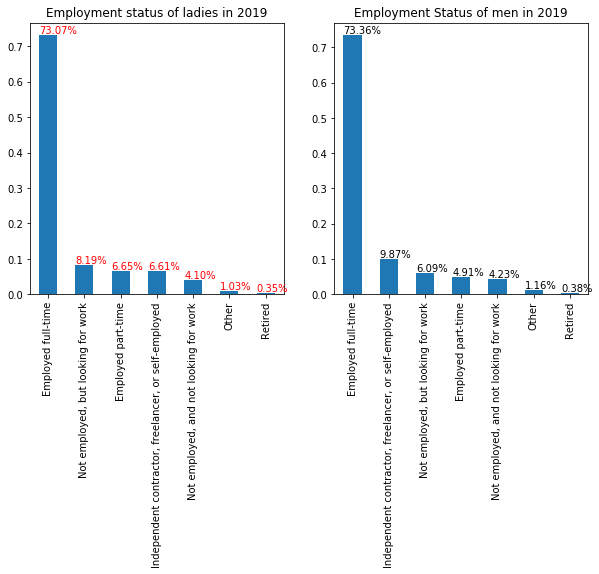

In [642]:
# plot proportion of employment types for men and women
data_w = df_f["Employment"].value_counts()/df_f.shape[0]
data_m = df_m["Employment"].value_counts()/df_m.shape[0]
fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
data_w.plot(kind="bar");

for i, v in enumerate(data_w):
    plt.text(i-.25, 
              v+0.005, '{:.2f}%'.format(100*v), color ="red")
plt.title("Employment status of ladies in 2019");

plt.subplot(1, 2, 2)
(df_m["Employment"].value_counts()/df_m.shape[0]).plot(kind="bar");
for i, v in enumerate(data_m):
    plt.text(i-.25, 
              v+0.005,  '{:.2f}%'.format(100*v), color ="black")

plt.title("Employment Status of men in 2019");
plt.show()

73 per cent of men and women secured permanent roles. Still, 3% more women are looking for a job. This may be an indicator that it is still more difficult for a woman to break into the industry.

## Pay and Gender 

What is the difference in their pay?

In [79]:
def bar_plot(data_a, data_b, title):
    """Display grouped bar chart
    INPUT:
    data-a, data_a-> 2 lists to explore
    title-->substring of the title of the plot
    OUTPUT:
    None, displays scatterplot
    """  
    ax = plt.subplot(111)
    w = 0.3
    x = np.arange(len(labels))
    #ig = plt.figure(figsize=(8,6))
    ax.bar(x, data_a, width=w, color='y', align='center', label ="Male")
    ax.bar(x+w, data_b, width=w, color='b', align='center', label= "Female")
    # Add some text for labels, title and custom x-axis tick labels, etc.
 
    ax.set_ylabel('Number of Respondents')
    ax.set_title('{} of Respondents'.format(title))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.autoscale(tight=True)

In [80]:
bins =   [0,10000,20000,  40000,  80000,  120000,160000,  200000]
labels = ['10000','20000','40000','80000',
          '120000','160000',
          '200000']
m_income = pd.cut(df_m.Salary, bins,labels=labels).value_counts()/df_m.shape[0]
f_income = pd.cut(df_f.Salary, bins,labels=labels).value_counts()/df_f.shape[0]

test = len(bins)-len(labels)
test

1

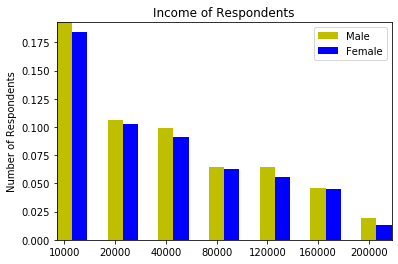

In [81]:
bar_plot(m_income, f_income, 'Income')

#### Unfilterd salary

In [95]:
print("The average salary for woman is ${} and for man is ${}.".format(round(df_f.Salary.mean(), 2),
                                                                       round(df_m.Salary.mean(), 2)))


The average salary for woman is $68610.42 and for man is $82928.93.


In [97]:
print("The most common salary for woman is ${} and for man is ${}.".format(round(df_f.Salary.median(), 2),
                                                                       round(df_m.Salary.median(), 2)))

The most common salary for woman is $15240.0 and for man is $23376.0.


The most common salary for a woman is $ 15240.0 

and for man is $ 23376.0. 
The average salary for woman is $ 68610.42
and for man is $ 82928.93.


That displays the real situation on the market. Ladies still underpaid by more than 4000 dollars on average. 

## Conclusion

This project contains data from annual Stack Overflow survey. The goal of this work was to compare features and answer questions related to the difference between male and female developer. 

Analyzing this dataset I made some conclusions:
    - Only 7.1 per cent of all respondents are women and 87.9 by men.
    - Both male and femail respondents see as most popular languages:
        - C    
        - Java    
        - JavaScript    
        - HTML/CSS    
        - SQL    
        - Python
        
     - 75 per cent of male respondents work as professional developers compare to 69 per cent of women. On the contrary, 14.61% of ladies perform some sort of codding at work compare to 10.87 per cent of the male respondents.
     - The difference in age groups is minimal. The biggest discrepancy of nearly 4.5 per cent is in the 35-44 age group.
     - The top 3 counties of respondents residence are US, India and UK. The proportion of female developers recited in the US outnumbered male developers by 12.5%. This may change if the perception of a woman as a developer.
     - 73 per cent of men and women secured permanent roles. Still, 3% more women are looking for a job. This may be an indicator that it is still more difficult for a woman to break into the industry.
     - The most common salary for a woman is $ 15240.0  and for man is $ 23376.0. The average salary for a woman is $68610.42 and for man is $82928.93.That displays the real situation on the market. Ladies still underpaid by more than at least 4000 dollars on average.
     
     While there is can be seen some positive trends in the world's perception of a woman as a developer. The gap still present, the ladies are underpaid. 